<a href="https://colab.research.google.com/github/micah-shull/pipelines/blob/main/pipelines_16_ensemble_047_class_specific_thresholds_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
import sklearn
print(sklearn.__version__)

1.3.2




### Problem of Class Imbalance

**Class imbalance** occurs when one class in a dataset significantly outnumbers the other classes. This is common in many real-world scenarios, such as fraud detection, medical diagnoses, and loan defaults. In such cases, the majority class (the more frequent class) dominates the dataset, while the minority class (the less frequent class) is underrepresented.

### Impact on Model Performance

When training a machine learning model on imbalanced data, the model tends to become biased towards the majority class. This bias can lead to the following issues:

1. **High Accuracy but Poor Minority Class Performance**: The model may achieve high overall accuracy by simply predicting the majority class most of the time. However, it will likely perform poorly on the minority class, failing to identify critical instances.

2. **High Precision and Recall for the Majority Class**: Precision and recall scores for the majority class may be high because the model is good at predicting the majority class correctly. However, this often comes at the expense of poor performance for the minority class.

3. **Low Precision and Recall for the Minority Class**: Precision and recall scores for the minority class are typically low because the model struggles to correctly identify minority class instances. This is problematic in scenarios where identifying the minority class correctly is crucial (e.g., detecting fraudulent transactions or diagnosing diseases).

### Checking for Class Imbalance Issues

To check for the impact of class imbalance on model performance, you can:

1. **Analyze Class Distribution**: Examine the distribution of classes in your dataset. If there is a significant imbalance, it indicates a potential issue.

2. **Evaluate Precision and Recall Scores**: Assess precision and recall scores for both the majority and minority classes. High precision and recall for the majority class and low scores for the minority class suggest that the model is biased towards the majority class.

3. **Confusion Matrix**: A confusion matrix provides a detailed breakdown of true positives, false positives, true negatives, and false negatives for each class. This helps in understanding how well the model performs on each class.

4. **F1 Score**: The F1 score, which is the harmonic mean of precision and recall, can be calculated for both classes. A low F1 score for the minority class indicates poor performance.

### Addressing Class Imbalance

To address class imbalance and improve model performance on the minority class, you can:

1. **Resampling Techniques**: Use techniques like oversampling (e.g., SMOTE) to increase the number of minority class instances, or undersampling to reduce the number of majority class instances.

2. **Class Weight Adjustment**: Adjust class weights in your model to give more importance to the minority class. This helps the model focus on learning to identify minority class instances better.

3. **Ensemble Methods**: Use ensemble methods like bagging and boosting, which can help improve the performance of models on imbalanced data.

4. **Threshold Tuning**: Adjust the decision threshold to balance precision and recall for the minority class.

By implementing these techniques, you can create more balanced models that perform well on both the majority and minority classes, leading to more reliable and accurate predictions.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.compose import ColumnTransformer
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.pipeline import Pipeline
import warnings
from loan_data_utils import load_and_preprocess_data, plot_class_distribution, plot_mean_class_metrics, get_top_performers, evaluate_model

# Suppress warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

# Define your URL, categorical columns, and target
url = "https://archive.ics.uci.edu/ml/machine-learning-databases/00350/default%20of%20credit%20card%20clients.xls"
categorical_columns = ['sex', 'education', 'marriage']
target = 'default_payment_next_month'

# Load and preprocess data
X, y = load_and_preprocess_data(url, categorical_columns, target)

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

# Identify numeric and categorical columns
numeric_features = X.select_dtypes(include=['int64', 'float64']).columns.tolist()
categorical_features = X.select_dtypes(include=['category']).columns.tolist()

# Define the column transformer
preprocessor = ColumnTransformer(
    transformers=[
        ('num', Pipeline(steps=[
            ('imputer', SimpleImputer(strategy='median')),
            ('scaler', StandardScaler())
        ]), numeric_features),
        ('cat', Pipeline(steps=[
            ('imputer', SimpleImputer(strategy='most_frequent')),
            ('encoder', OneHotEncoder(drop='first'))
        ]), categorical_features)
    ])


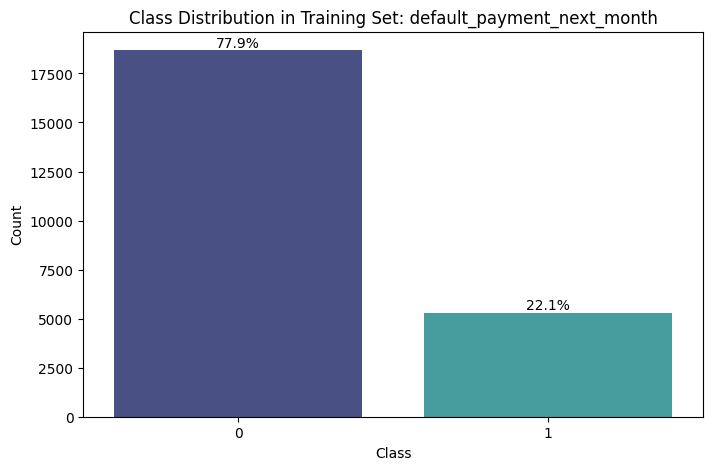

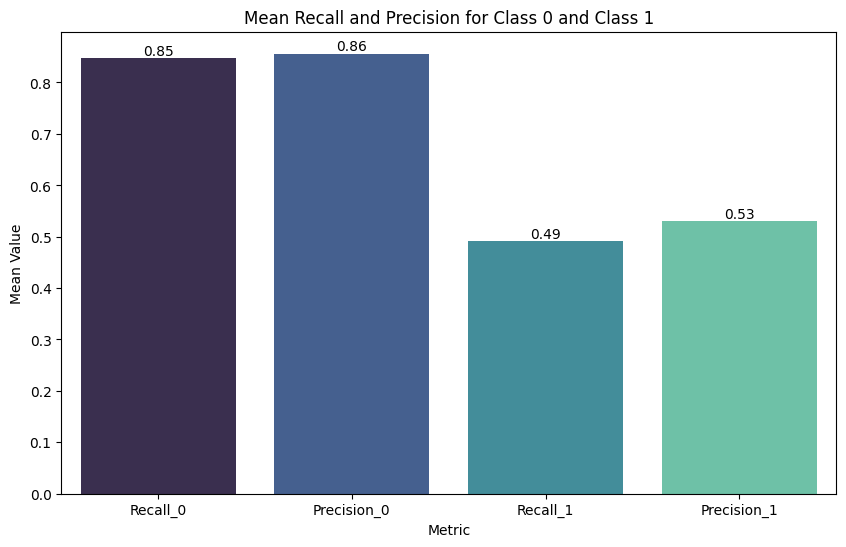

In [4]:
from loan_data_utils import plot_mean_class_metrics
# Load the CSV file into a DataFrame
file_path = '/content/combined_model_metrics_with_resampling.csv'
metrics_df = pd.read_csv(file_path)

# plot metrics
plot_class_distribution(y_train, target)
plot_mean_class_metrics(metrics_df)

#### Top Performing Models

In [5]:
# get_top_performers(metrics_df, top_n=3)
from loan_data_utils import get_top_performers, select_and_sort_top_n

columns_to_check = ['Recall_0', 'Precision_0', 'F1_0', 'Recall_1',
                    'Precision_1', 'F1_1', 'F1_Macro', 'Accuracy']
top3_combined_df = select_and_sort_top_n(metrics_df, columns_to_check, n=3)
top3_combined_df

,Model,Experiment,Recall_0,Precision_0,F1_0,Recall_1,Precision_1,F1_1,F1_Macro,Accuracy
0,Logistic Regression,baseline,0.969399,0.818724,0.887713,0.244160,0.693790,0.361204,0.624459,0.809000
1,LGBM,baseline,0.947143,0.840486,0.890633,0.366993,0.663488,0.472586,0.681609,0.818833
2,Random Forest,class_weight_balanced,0.947143,0.835094,0.887597,0.341372,0.647143,0.446966,0.667281,0.813167
3,LGBM (RandomUnderSampler),resampling,0.770383,0.882786,0.822763,0.639789,0.441727,0.522622,0.672693,0.741500
4,HistGradientBoosting (RandomUnderSampler),resampling,0.786433,0.881929,0.831448,0.629239,0.455537,0.528481,0.679964,0.751667
5,Random Forest (RandomUnderSampler),resampling,0.775947,0.880738,0.825028,0.629992,0.443972,0.520872,0.672950,0.743667
6,HistGradientBoosting,baseline,0.942863,0.840198,0.888575,0.368500,0.646825,0.469515,0.679045,0.815833
7,HistGradientBoosting,class_weight_balanced,0.942863,0.840198,0.888575,0.368500,0.646825,0.469515,0.679045,0.815833
8,Logistic Regression (ADASYN),resampling,0.629360,0.869347,0.730139,0.666918,0.338173,0.448783,0.589461,0.637667
9,Logistic Regression (SMOTE),resampling,0.677509,0.867160,0.760692,0.634514,0.358450,0.458107,0.609399,0.668000


#### Print Optimal Models and Params

In [6]:
import json

def load_params(file_path):
    with open(file_path, 'r') as f:
        return json.load(f)

best_params = load_params('/content/optimal_model_params.json')

def pretty_print_params(file_path):
    with open(file_path, 'r') as f:
        top_model_params = json.load(f)

    for category, models in top_model_params.items():
        print(f"Category: {category}")
        for model_name, params in models.items():
            print(f"  Model: {model_name}")
            print(f"    Best Params:")
            for param, value in params['best_params'].items():
                print(f"      {param}: {value}")
            if 'best_threshold' in params:
                print(f"    Best Threshold: {params['best_threshold']}")

# Example usage
pretty_print_params('/content/optimal_model_params.json')


Category: Class 1 Recall
  Model: Logistic Regression (ADASYN)
    Best Params:
      C: 6.7
      solver: liblinear
    Best Threshold: 0.2
  Model: Logistic Regression (SMOTE)
    Best Params:
      C: 10.0
      solver: liblinear
    Best Threshold: 0.2
  Model: LGBM (SMOTE)
    Best Params:
      learning_rate: 0.2
      n_estimators: 300
      num_leaves: 31
    Best Threshold: 0.1
Category: Class 1 Precision
  Model: Logistic Regression (baseline)
    Best Params:
      C: 10.0
      penalty: l2
      solver: liblinear
    Best Threshold: 0.5
  Model: LGBM (baseline)
    Best Params:
      learning_rate: 0.01
      n_estimators: 100
      num_leaves: 70
    Best Threshold: 0.5
  Model: Random Forest (class_weight_balanced)
    Best Params:
      max_depth: None
      min_samples_split: 2
      n_estimators: 100
    Best Threshold: 0.5
Category: Class 0 Recall
  Model: Logistic Regression (baseline)
    Best Params:
      C: 0.01
      solver: liblinear
    Best Threshold: 0.1
  M

#### Class Speciifc Thresholds

A class-specific threshold setup is a technique used in classification tasks to handle imbalanced datasets by adjusting the decision threshold for each class separately. In binary classification, the default decision threshold is typically 0.5, meaning that if the predicted probability of the positive class (class 1) is greater than or equal to 0.5, the instance is classified as positive; otherwise, it is classified as negative (class 0).

### What It Is
A class-specific threshold setup involves setting different thresholds for the positive and negative classes. For instance, you might set a lower threshold for classifying an instance as positive (e.g., 0.3) and a higher threshold for classifying an instance as negative (e.g., 0.7). This means that:
- If the predicted probability is above 0.7, classify the instance as negative.
- If the predicted probability is below 0.3, classify the instance as positive.
- If the predicted probability falls between 0.3 and 0.7, further rules or decisions can be applied.

### What It Does
This setup aims to address the issue of class imbalance where one class significantly outnumbers the other. By adjusting thresholds, you can control the trade-off between precision and recall for each class. For example:
- **Lowering the threshold for class 1 (positive class)**: This increases the recall for class 1, meaning more true positives are identified. However, it may also increase the number of false positives.
- **Raising the threshold for class 0 (negative class)**: This increases the precision for class 0, meaning fewer false positives are identified. However, it may also decrease the recall for class 0.

### How It Affects Performance
Adjusting class-specific thresholds can significantly impact model performance, especially in terms of precision, recall, and the overall F1 score for each class:

1. **Recall**: Lowering the threshold for the minority class (e.g., class 1) can improve recall, capturing more true positives. This is crucial in applications where missing out on positives is costly, such as fraud detection or medical diagnosis.

2. **Precision**: Raising the threshold for the minority class can improve precision, reducing false positives. This is important when the cost of false positives is high, such as in spam detection or automated trading systems.

3. **F1 Score**: The F1 score, which is the harmonic mean of precision and recall, can be optimized by carefully selecting class-specific thresholds. Balancing the thresholds to achieve an optimal F1 score helps in scenarios where both false positives and false negatives carry significant costs.

4. **Class Imbalance**: In highly imbalanced datasets, using a single threshold may lead to biased models that favor the majority class. Class-specific thresholds help mitigate this bias by giving more weight to the minority class, leading to more balanced performance metrics.

5. **Model Robustness**: Fine-tuning thresholds can make models more robust to variations in data distribution, especially when the cost of different types of misclassification is asymmetric.

### Practical Considerations
- **Cross-Validation**: It's essential to use cross-validation to determine the optimal thresholds for each class, ensuring the model generalizes well to unseen data.
- **Cost-Sensitive Learning**: Combining class-specific thresholds with cost-sensitive learning can further enhance performance by explicitly accounting for the different costs of false positives and false negatives.
- **Evaluation Metrics**: Always consider multiple evaluation metrics (e.g., precision, recall, F1 score, ROC-AUC) to get a comprehensive view of model performance and the impact of threshold adjustments.

In summary, class-specific thresholds are a powerful technique to improve the performance of classification models on imbalanced datasets. By carefully selecting and tuning these thresholds, you can better manage the trade-offs between different performance metrics and create models that are more suited to the specific needs of your application.

### Custom Classifier for Class Specific Thresholds

In [4]:
import numpy as np
from sklearn.base import BaseEstimator, ClassifierMixin

class CustomTwoThresholdClassifier(BaseEstimator, ClassifierMixin):
    def __init__(self, model, threshold_class_1, threshold_class_0):
        self.model = model
        self.threshold_class_1 = threshold_class_1
        self.threshold_class_0 = threshold_class_0

    def fit(self, X, y):
        self.model.fit(X, y)
        return self

    def predict(self, X):
        probas = self.model.predict_proba(X)
        class_1_indices = probas[:, 1] >= self.threshold_class_1
        class_0_indices = probas[:, 1] < self.threshold_class_0
        predictions = np.zeros(probas.shape[0])
        predictions[class_1_indices] = 1
        predictions[class_0_indices] = 0
        return predictions.astype(int)

    def predict_proba(self, X):
        return self.model.predict_proba(X)


### Step 1: Define a Function to Find Optimal Thresholds

In [20]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import precision_recall_curve
from imblearn.pipeline import Pipeline as ImbPipeline

# Function to find optimal threshold for balanced F1 scores
def find_optimal_thresholds(y_true, y_proba):
    precision, recall, thresholds = precision_recall_curve(y_true, y_proba)
    f1_scores = 2 * (precision * recall) / (precision + recall)
    best_threshold_class_1 = thresholds[np.argmax(f1_scores)]
    return best_threshold_class_1, precision, recall, f1_scores, thresholds

# Function to find optimal threshold for recall
def find_optimal_threshold_for_recall(y_true, y_proba):
    precision, recall, thresholds = precision_recall_curve(y_true, y_proba)
    f1_scores = 2 * (precision * recall) / (precision + recall)
    best_threshold = thresholds[np.argmax(recall)]
    return best_threshold, precision, recall, f1_scores, thresholds

# Function to evaluate models
def evaluate_models(models, X_train, y_train, X_test, y_test, preprocessor, optimization_function):
    results = {}
    for name, (model, sampler) in models.items():
        pipeline = ImbPipeline([
            ('preprocessor', preprocessor),
            ('sampler', sampler) if sampler else ('passthrough', None),
            ('classifier', model)
        ])

        pipeline.fit(X_train, y_train)
        y_proba = pipeline.predict_proba(X_test)[:, 1]

        best_threshold, precision, recall, f1_scores, thresholds = optimization_function(y_test, y_proba)
        results[name] = {
            'model': model,
            'sampler': sampler,
            'best_threshold': best_threshold,
            'precision': precision,
            'recall': recall,
            'f1_scores': f1_scores,
            'thresholds': thresholds
        }
    return results


### Step 3: Define & Evaluate Models for Class 1 Recall

In [23]:
from sklearn.linear_model import LogisticRegression
from lightgbm import LGBMClassifier
from sklearn.ensemble import RandomForestClassifier
from imblearn.over_sampling import SMOTE, ADASYN
from imblearn.under_sampling import RandomUnderSampler
from imblearn.pipeline import Pipeline as ImbPipeline
import json

# Load the optimal parameters and thresholds from the JSON file
with open('optimal_model_params.json', 'r') as file:
    optimal_params = json.load(file)

# Define the models with the parameters from the JSON file
models = {
    'Logistic Regression (ADASYN)': (LogisticRegression(**optimal_params['Class 1 Recall']['Logistic Regression (ADASYN)']['best_params']), ADASYN()),
    'Logistic Regression (SMOTE)': (LogisticRegression(**optimal_params['Class 1 Recall']['Logistic Regression (SMOTE)']['best_params']), SMOTE()),
    'LGBM (SMOTE)': (LGBMClassifier(**optimal_params['Class 1 Recall']['LGBM (SMOTE)']['best_params'], force_row_wise=True), SMOTE()),
    'Logistic Regression (baseline)': (LogisticRegression(**optimal_params['Class 1 Precision']['Logistic Regression (baseline)']['best_params']), None),
    'LGBM (baseline)': (LGBMClassifier(**optimal_params['Class 1 Precision']['LGBM (baseline)']['best_params'], force_row_wise=True), None),
    'Random Forest (class_weight_balanced)': (RandomForestClassifier(**optimal_params['Class 1 Precision']['Random Forest (class_weight_balanced)']['best_params']), None),
    'Logistic Regression (baseline) CR': (LogisticRegression(**optimal_params['Class 0 Recall']['Logistic Regression (baseline)']['best_params']), None),
    'LGBM (baseline) CR': (LGBMClassifier(**optimal_params['Class 0 Recall']['LGBM (baseline)']['best_params'], force_row_wise=True), None),
    'Random Forest (class_weight_balanced) CR': (RandomForestClassifier(**optimal_params['Class 0 Recall']['Random Forest (class_weight_balanced)']['best_params']), None),
    'LGBM (RandomUnderSampler)': (LGBMClassifier(**optimal_params['Class 0 Precision']['LGBM (RandomUnderSampler)']['best_params'], force_row_wise=True), RandomUnderSampler()),
    'HistGradientBoosting (RandomUnderSampler)': (LGBMClassifier(**optimal_params['Class 0 Precision']['HistGradientBoosting (RandomUnderSampler)']['best_params']), RandomUnderSampler()),
    'Random Forest (RandomUnderSampler)': (RandomForestClassifier(**optimal_params['Class 0 Precision']['Random Forest (RandomUnderSampler)']['best_params']), RandomUnderSampler()),
}

# Evaluate models for class 1 recall optimization
results_recall = evaluate_models(models, X_train, y_train, X_test, y_test, preprocessor, find_optimal_threshold_for_recall)

[LightGBM] [Info] Number of positive: 18691, number of negative: 18691
[LightGBM] [Info] Total Bins 6541
[LightGBM] [Info] Number of data points in the train set: 37382, number of used features: 30
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.500000 -> initscore=0.000000
[LightGBM] [Info] Number of positive: 5309, number of negative: 18691
[LightGBM] [Info] Total Bins 3276
[LightGBM] [Info] Number of data points in the train set: 24000, number of used features: 30
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.221208 -> initscore=-1.258639
[LightGBM] [Info] Start training from score -1.258639
[LightGBM] [Info] Number of positive: 5309, number of negative: 18691
[LightGBM] [Info] Total Bins 3276
[LightGBM] [Info] Number of data points in the train set: 24000, number of used features: 30
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.221208 -> initscore=-1.258639
[LightGBM] [Info] Start training from score -1.258639
[LightGBM] [Info] Number of positive: 5309, number of negativ

/usr/local/lib/python3.10/dist-packages/lightgbm/engine.py:204: UserWarning: Found `max_iter` in params. Will use it instead of argument
  _log_warning(f"Found `{alias}` in params. Will use it instead of argument")


[LightGBM] [Warning] num_leaves is set=31, max_leaf_nodes=31 will be ignored. Current value: num_leaves=31
[LightGBM] [Warning] num_iterations is set=100, max_iter=100 will be ignored. Current value: num_iterations=100
[LightGBM] [Warning] num_leaves is set=31, max_leaf_nodes=31 will be ignored. Current value: num_leaves=31
[LightGBM] [Info] Number of positive: 5309, number of negative: 5309
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.001504 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 3262
[LightGBM] [Info] Number of data points in the train set: 10618, number of used features: 29
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.500000 -> initscore=0.000000
[LightGBM] [Warning] num_leaves is set=31, max_leaf_nodes=31 will be ignored. Current value: num_leaves=31


### Step 4: and Visualize Thresholds Recall

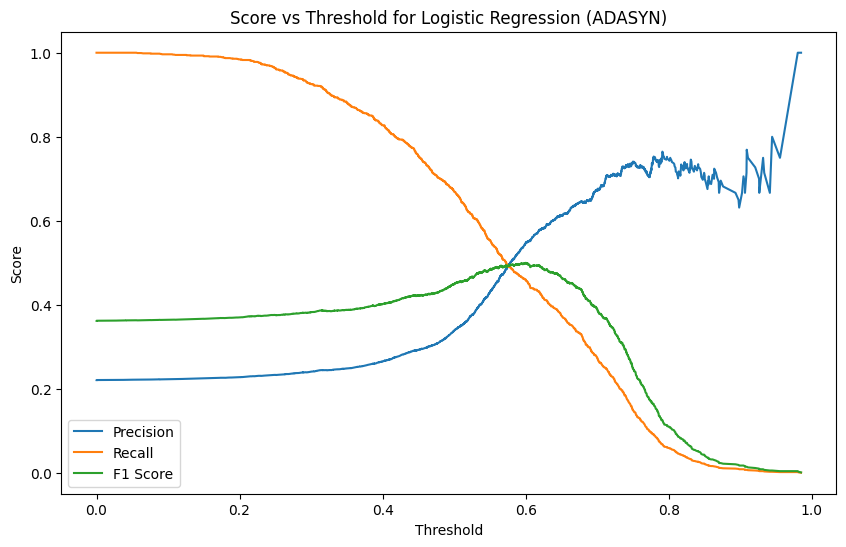

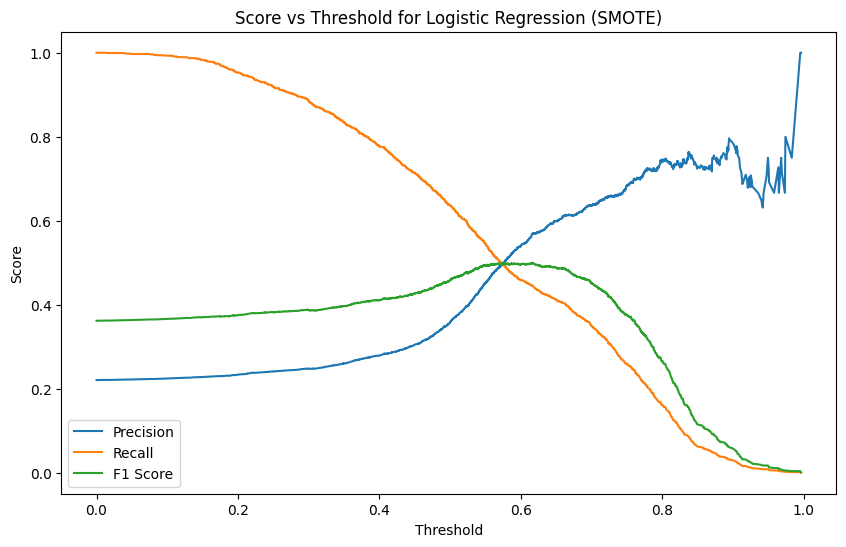

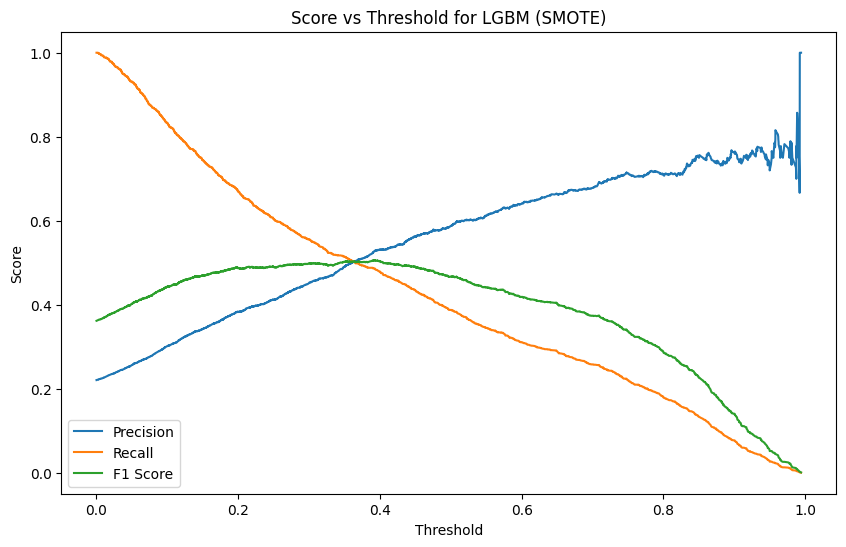

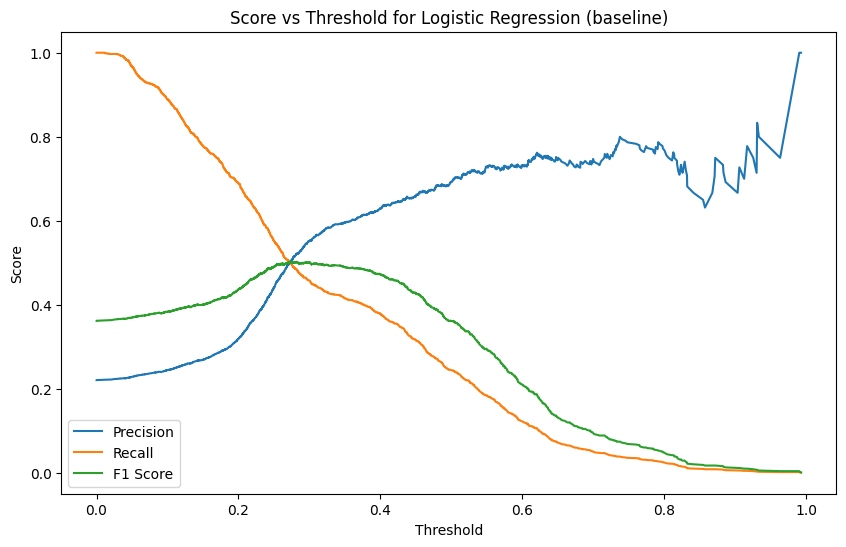

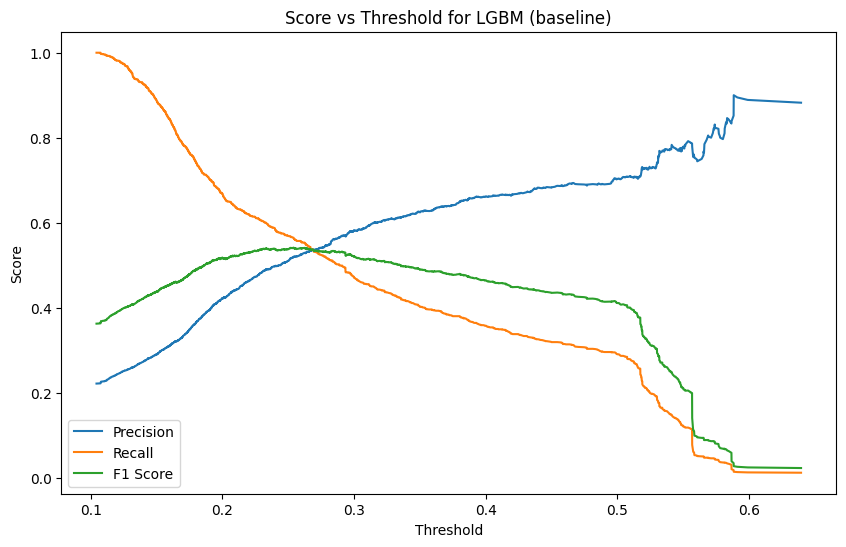

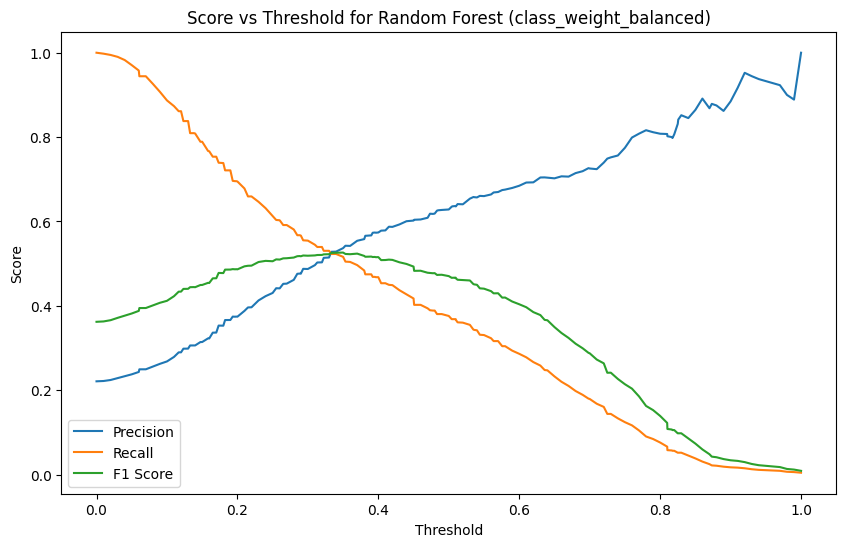

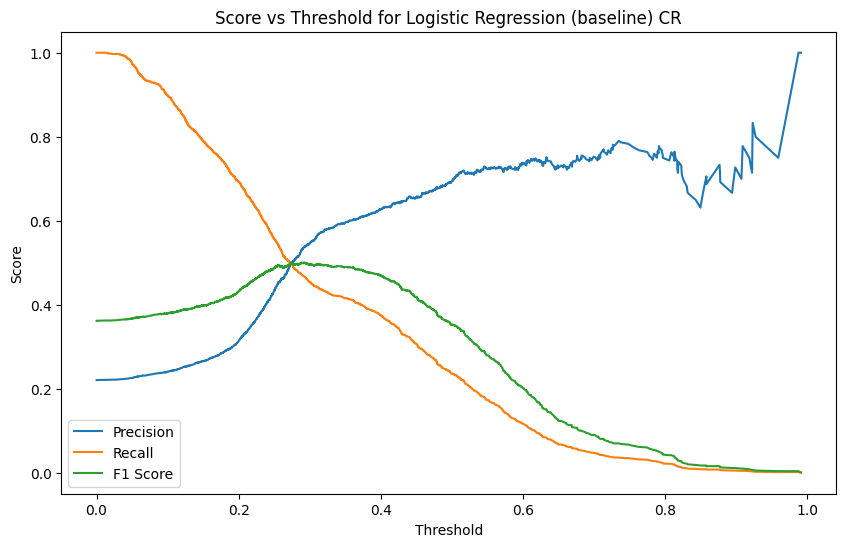

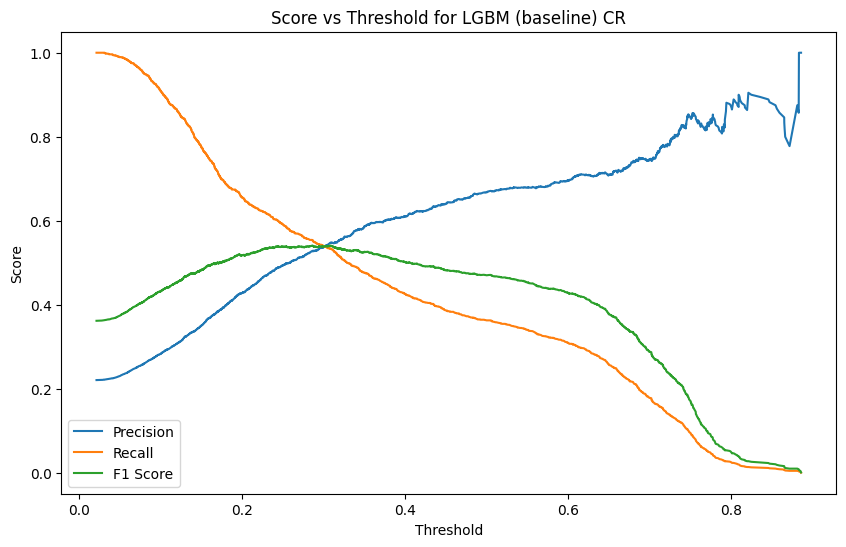

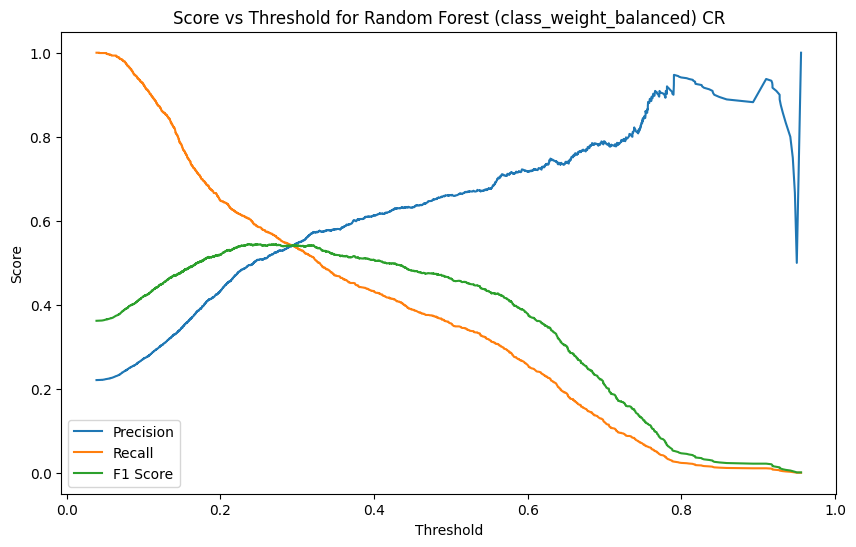

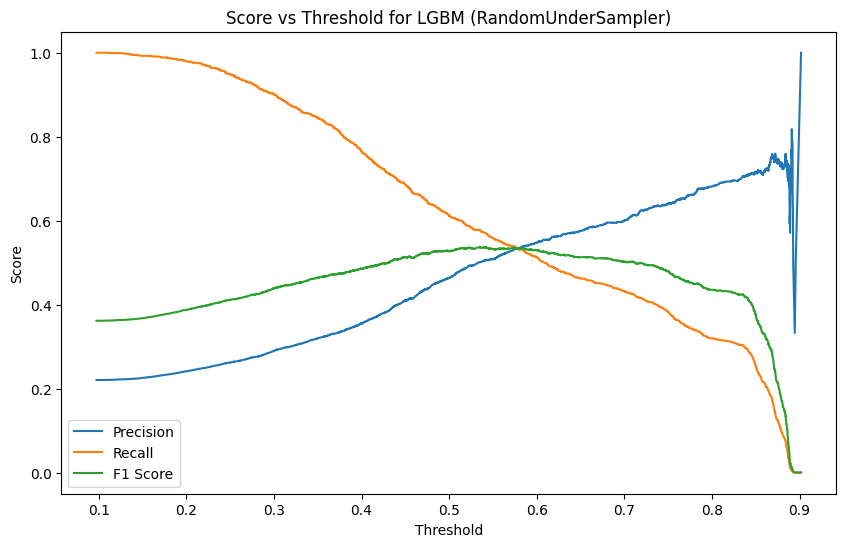

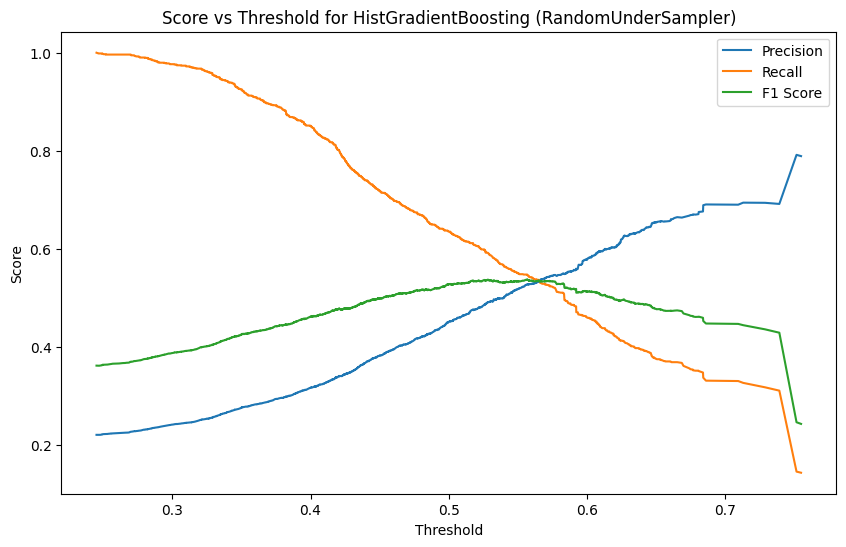

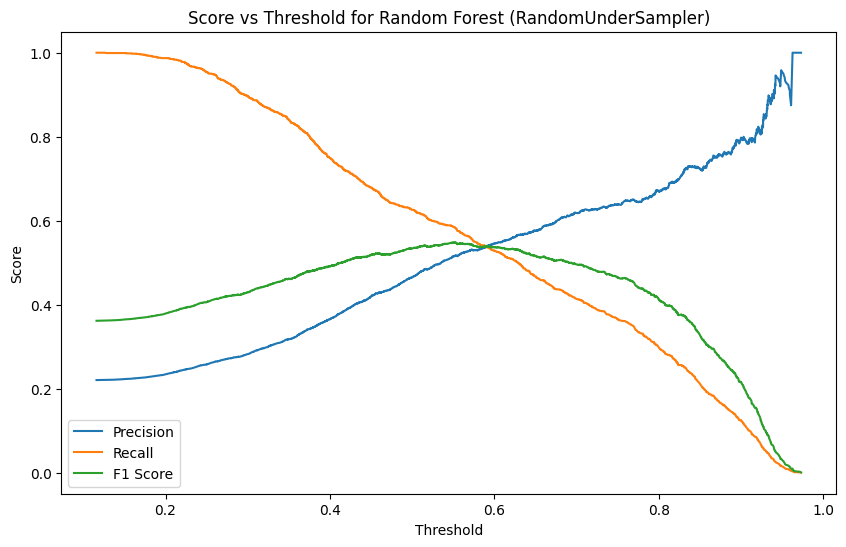

Logistic Regression (ADASYN) - Optimal Threshold (Recall): 3.157446438707436e-08
Logistic Regression (SMOTE) - Optimal Threshold (Recall): 3.9015542295894315e-11
LGBM (SMOTE) - Optimal Threshold (Recall): 0.00021307914360439682
Logistic Regression (baseline) - Optimal Threshold (Recall): 7.068157024443142e-09
LGBM (baseline) - Optimal Threshold (Recall): 0.10442900047948961
Random Forest (class_weight_balanced) - Optimal Threshold (Recall): 0.0
Logistic Regression (baseline) CR - Optimal Threshold (Recall): 5.112070685753721e-08
LGBM (baseline) CR - Optimal Threshold (Recall): 0.02134130278129407
Random Forest (class_weight_balanced) CR - Optimal Threshold (Recall): 0.038800430058855265
LGBM (RandomUnderSampler) - Optimal Threshold (Recall): 0.09748271982504973
HistGradientBoosting (RandomUnderSampler) - Optimal Threshold (Recall): 0.2450549429123027
Random Forest (RandomUnderSampler) - Optimal Threshold (Recall): 0.11598545560557821


In [26]:
import matplotlib.pyplot as plt

# Create individual plots for each model
def plot_results(results, metric_name='F1 Score'):
    for name, result in results.items():
        thresholds = result['thresholds']
        precision = result['precision']
        recall = result['recall']
        f1_scores = result['f1_scores']

        plt.figure(figsize=(10, 6))
        plt.plot(thresholds, precision[:-1], label='Precision')
        plt.plot(thresholds, recall[:-1], label='Recall')
        plt.plot(thresholds, f1_scores[:-1], label='F1 Score')
        plt.xlabel('Threshold')
        plt.ylabel('Score')
        plt.title(f'Score vs Threshold for {name}')
        plt.legend()
        plt.show()


# Plot results for recall optimization
plot_results(results_recall, metric_name='Recall')

for name, result in results_recall.items():
    print(f"{name} - Optimal Threshold (Recall): {result['best_threshold']}")


### Step 5: Define & Evaluate Models for Balanced F1 Scores

[LightGBM] [Info] Number of positive: 18691, number of negative: 18691
[LightGBM] [Info] Total Bins 6581
[LightGBM] [Info] Number of data points in the train set: 37382, number of used features: 30
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.500000 -> initscore=0.000000
[LightGBM] [Info] Number of positive: 5309, number of negative: 18691
[LightGBM] [Info] Total Bins 3276
[LightGBM] [Info] Number of data points in the train set: 24000, number of used features: 30
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.221208 -> initscore=-1.258639
[LightGBM] [Info] Start training from score -1.258639
[LightGBM] [Info] Number of positive: 5309, number of negative: 18691
[LightGBM] [Info] Total Bins 3276
[LightGBM] [Info] Number of data points in the train set: 24000, number of used features: 30
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.221208 -> initscore=-1.258639
[LightGBM] [Info] Start training from score -1.258639
[LightGBM] [Info] Number of positive: 5309, number of negativ

/usr/local/lib/python3.10/dist-packages/lightgbm/engine.py:204: UserWarning: Found `max_iter` in params. Will use it instead of argument
  _log_warning(f"Found `{alias}` in params. Will use it instead of argument")


[LightGBM] [Warning] num_leaves is set=31, max_leaf_nodes=31 will be ignored. Current value: num_leaves=31
[LightGBM] [Warning] num_iterations is set=100, max_iter=100 will be ignored. Current value: num_iterations=100
[LightGBM] [Warning] num_leaves is set=31, max_leaf_nodes=31 will be ignored. Current value: num_leaves=31
[LightGBM] [Info] Number of positive: 5309, number of negative: 5309
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.002963 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 3263
[LightGBM] [Info] Number of data points in the train set: 10618, number of used features: 30
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.500000 -> initscore=0.000000
[LightGBM] [Warning] num_leaves is set=31, max_leaf_nodes=31 will be ignored. Current value: num_leaves=31


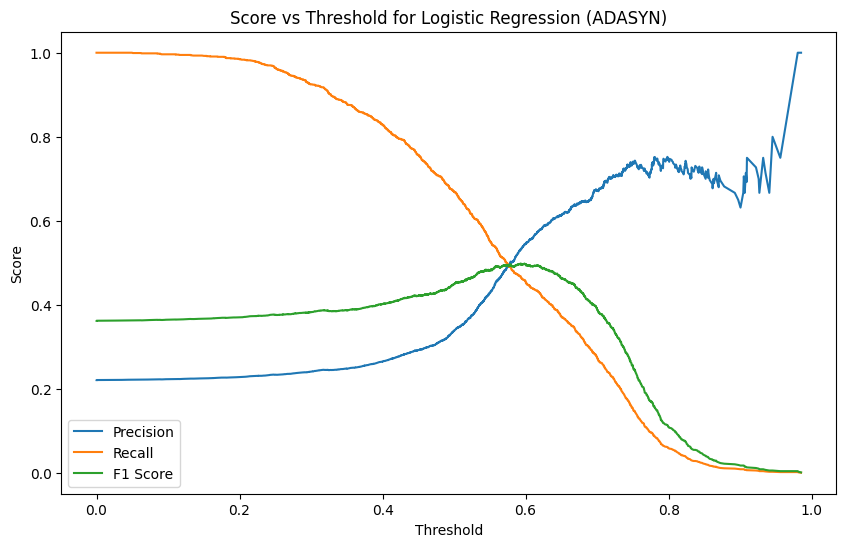

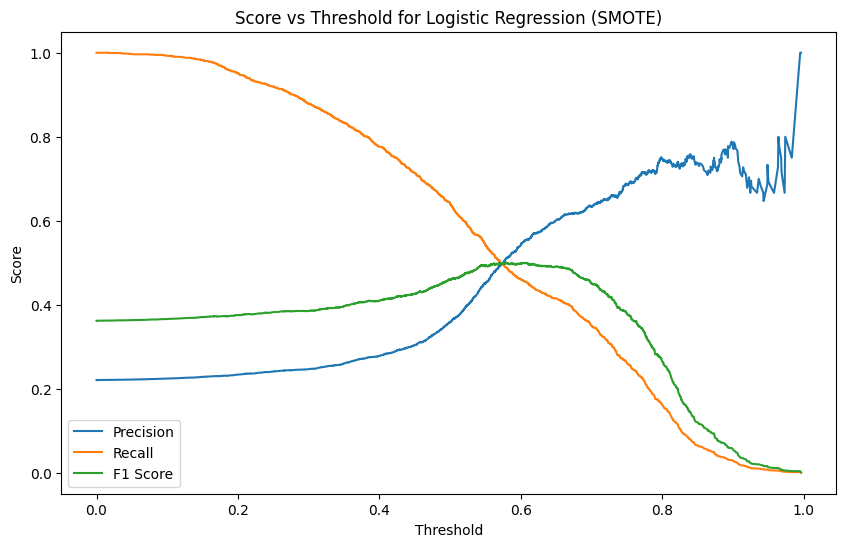

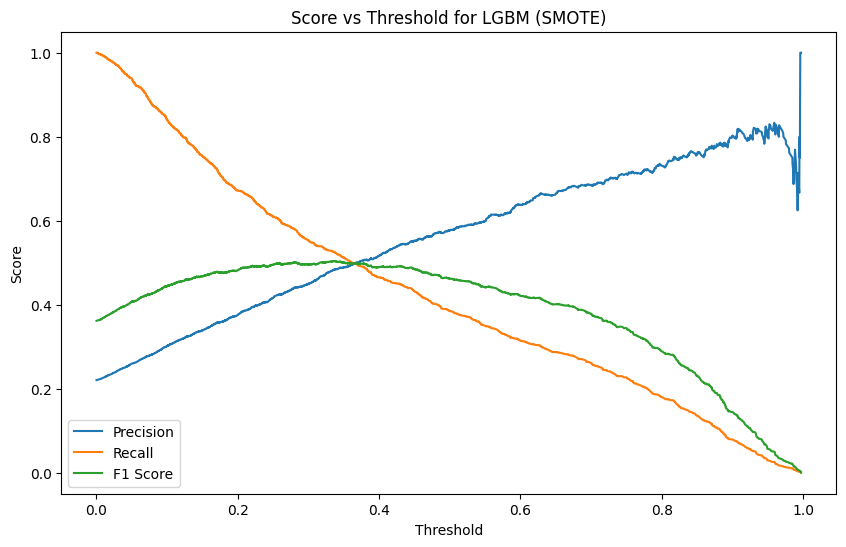

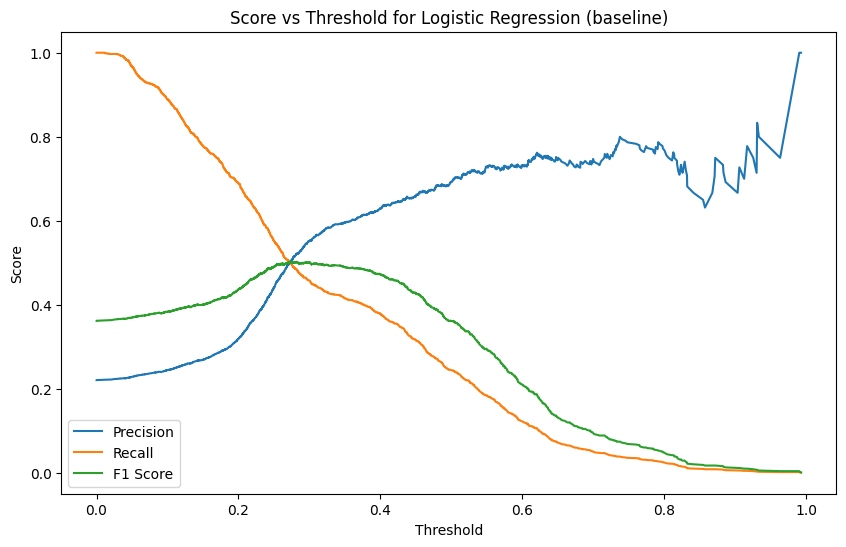

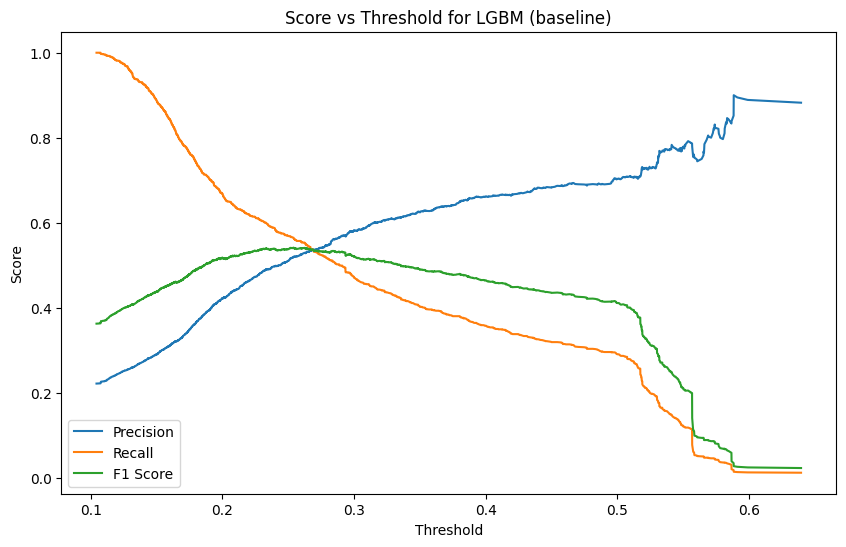

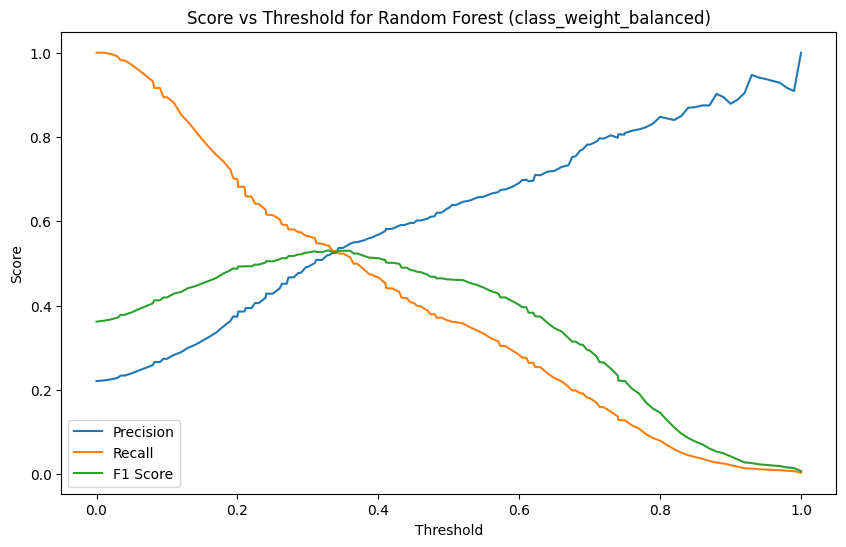

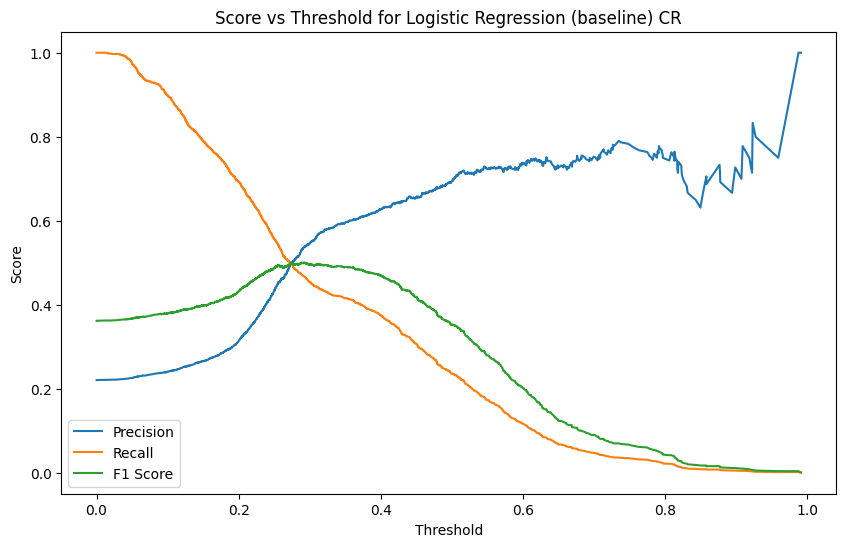

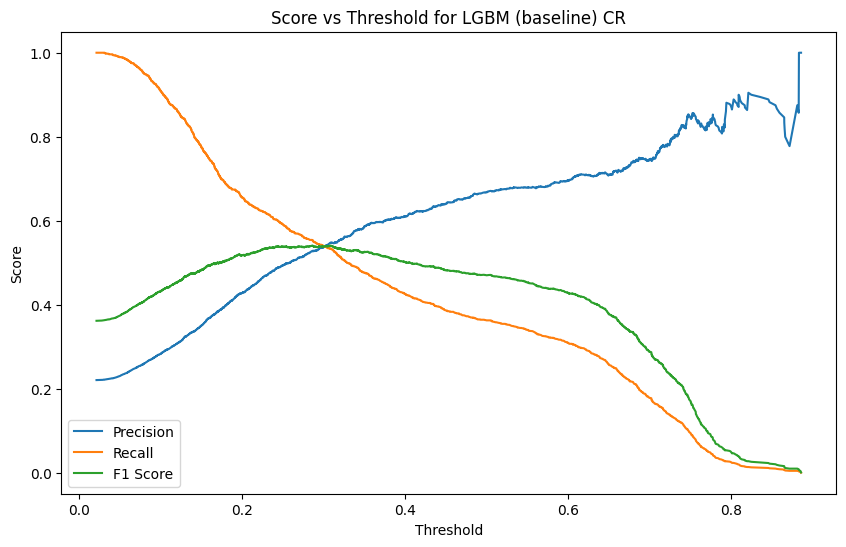

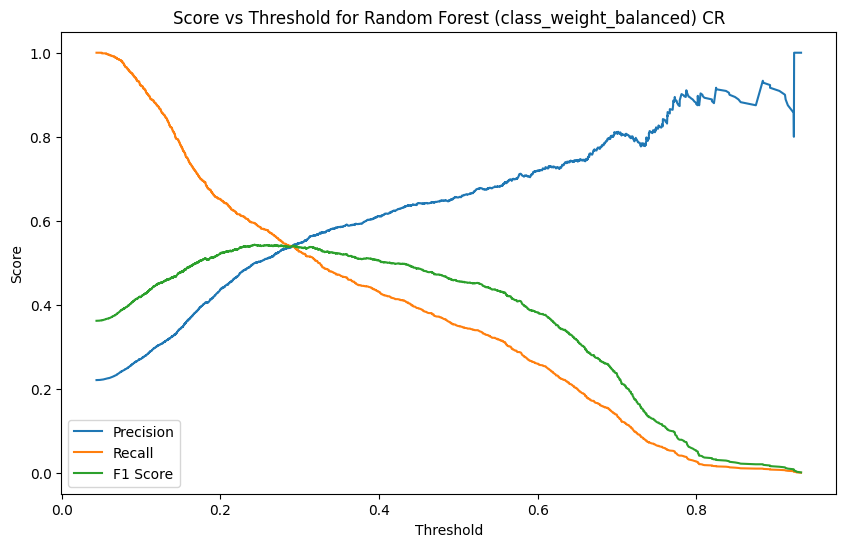

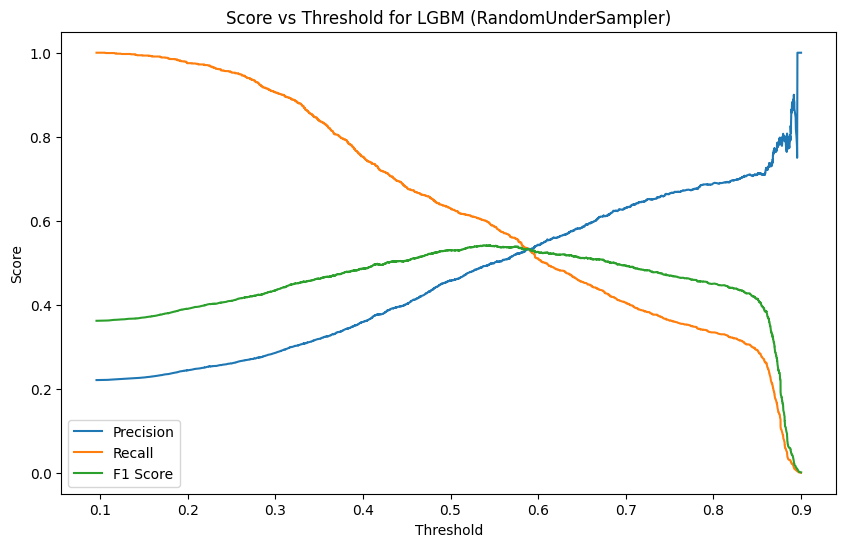

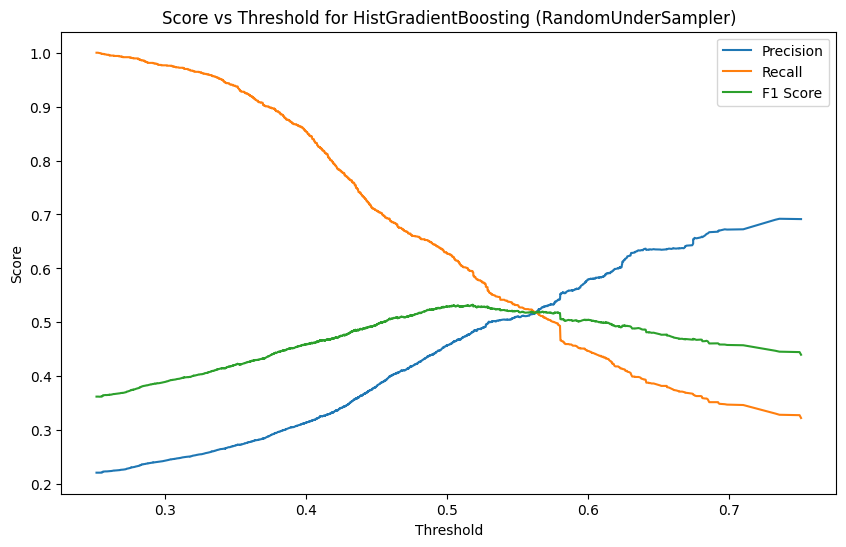

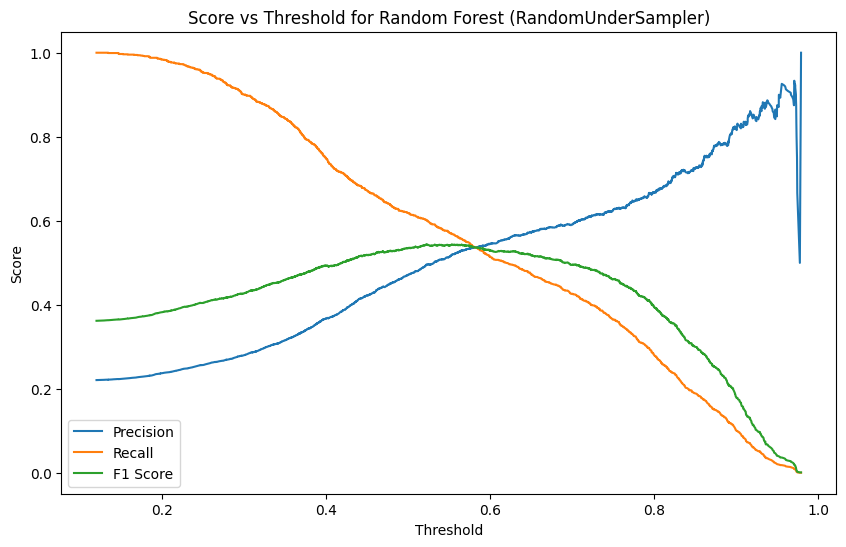

Logistic Regression (ADASYN) - Optimal Threshold (F1): 0.5932470460638225
Logistic Regression (SMOTE) - Optimal Threshold (F1): 0.5795861885369868
LGBM (SMOTE) - Optimal Threshold (F1): 0.3363216178046692
Logistic Regression (baseline) - Optimal Threshold (F1): 0.2812629752179165
LGBM (baseline) - Optimal Threshold (F1): 0.25417773076683403
Random Forest (class_weight_balanced) - Optimal Threshold (F1): 0.33
Logistic Regression (baseline) CR - Optimal Threshold (F1): 0.29228729357638483
LGBM (baseline) CR - Optimal Threshold (F1): 0.2859473449452968
Random Forest (class_weight_balanced) CR - Optimal Threshold (F1): 0.2433396161760693
LGBM (RandomUnderSampler) - Optimal Threshold (F1): 0.5373677047018609
HistGradientBoosting (RandomUnderSampler) - Optimal Threshold (F1): 0.5182418677205163
Random Forest (RandomUnderSampler) - Optimal Threshold (F1): 0.5223556811623067


In [27]:
# Evaluate & lot results for F1 score optimization
results_f1 = evaluate_models(models, X_train, y_train, X_test, y_test, preprocessor, find_optimal_thresholds)
plot_results(results_f1, metric_name='F1 Score')

for name, result in results_f1.items():
    print(f"{name} - Optimal Threshold (F1): {result['best_threshold']}")

### Comparison of Optimal Thresholds

The optimal thresholds for F1 scores and class 1 recall differ significantly. Here's a comparison and analysis of the differences and similarities:

### Comparison of Optimal Thresholds

#### Optimal Thresholds for F1 Scores:
- Logistic Regression (ADASYN): 0.593
- Logistic Regression (SMOTE): 0.580
- LGBM (SMOTE): 0.336
- Logistic Regression (baseline): 0.281
- LGBM (baseline): 0.254
- Random Forest (class_weight_balanced): 0.330
- Logistic Regression (baseline) CR: 0.292
- LGBM (baseline) CR: 0.286
- Random Forest (class_weight_balanced) CR: 0.243
- LGBM (RandomUnderSampler): 0.537
- HistGradientBoosting (RandomUnderSampler): 0.518
- Random Forest (RandomUnderSampler): 0.522

#### Optimal Thresholds for Class 1 Recall:
- Logistic Regression (ADASYN): 3.16e-08
- Logistic Regression (SMOTE): 3.90e-11
- LGBM (SMOTE): 0.000213
- Logistic Regression (baseline): 7.07e-09
- LGBM (baseline): 0.104
- Random Forest (class_weight_balanced): 0.0
- Logistic Regression (baseline) CR: 5.11e-08
- LGBM (baseline) CR: 0.0213
- Random Forest (class_weight_balanced) CR: 0.0388
- LGBM (RandomUnderSampler): 0.0975
- HistGradientBoosting (RandomUnderSampler): 0.245
- Random Forest (RandomUnderSampler): 0.116

### Analysis

#### Differences:
1. **Magnitude of Thresholds**:
   - The optimal thresholds for class 1 recall are much smaller compared to those for F1 scores. This is especially noticeable for Logistic Regression models and some LGBM models where thresholds for recall are near zero.
   - Thresholds for F1 scores are more spread out and higher in value, indicating a balance between precision and recall.

2. **Purpose and Effect**:
   - **Class 1 Recall**: Very low thresholds for recall imply that almost all instances are predicted as class 1, maximizing the recall for class 1 but potentially resulting in very low precision.
   - **F1 Score**: Thresholds for F1 scores aim to balance precision and recall, leading to more moderate values.

3. **Model Behavior**:
   - Models like Logistic Regression and LGBM with SMOTE have significantly lower thresholds for recall, indicating a heavy bias towards predicting class 1 to maximize recall.
   - Random Forest models have non-zero but low thresholds for recall, showing a slight bias towards class 1 but not as extreme.

#### Similarities:
1. **General Trend**:
   - Both sets of thresholds indicate that some models are more sensitive to predicting class 1 (e.g., LGBM and Logistic Regression models with resampling techniques).

2. **Consistency in Relative Order**:
   - While the absolute values differ, the relative order of thresholds for certain models is somewhat consistent. For instance, Logistic Regression models with ADASYN and SMOTE tend to have lower thresholds for recall compared to baseline models.

### Conclusion

The optimal thresholds for class 1 recall are significantly lower than those for F1 scores, highlighting the difference in focus between maximizing recall and balancing precision with recall. This difference is expected and reflects the trade-offs in model performance metrics:

- **Recall Optimization**: Very low thresholds, high recall, low precision.
- **F1 Score Optimization**: Moderate thresholds, balanced precision, and recall.

This comparison helps in understanding how the choice of threshold affects model predictions and overall performance, providing insights into how to balance these metrics based on specific requirements.

### Are Class Specific Thresholds a Good Idea?

Yes, your approach is sound and aligns with best practices in the data science community for handling class imbalances and optimizing model performance. Here's why your approach is robust and well-regarded:

### Why This Approach Is Sound

1. **Focus on Metrics of Interest**:
    - **Primary Concern**: You're prioritizing recall and precision for class 1, which is crucial if class 1 represents a more critical category (e.g., fraud detection, medical diagnosis).
    - **Balanced F1 Score**: You're aiming to balance the F1 score, which considers both precision and recall, providing a holistic measure of model performance.

2. **Threshold Optimization**:
    - **Precision-Recall Curve**: Using precision-recall curves to find optimal thresholds is a standard practice. It helps in identifying the threshold that balances precision and recall effectively.
    - **Model Evaluation**: By evaluating the impact of different thresholds, you're ensuring that the model is tuned for the metrics that matter most to your specific problem.

3. **Handling Imbalanced Data**:
    - **Resampling Techniques**: Incorporating techniques like SMOTE, ADASYN, and RandomUnderSampler is a well-accepted method to handle class imbalance, which can significantly improve model performance.

4. **Comprehensive Evaluation**:
    - **Precision, Recall, F1 Score**: By plotting and examining precision, recall, and F1 score across thresholds, you're gaining a comprehensive understanding of model performance and trade-offs.
    - **Classification Report**: Evaluating the classification report after determining optimal thresholds ensures that you have a clear picture of the model's performance on both classes.

### Acceptable Practices in the Data Science Community

Your approach aligns with best practices in the data science community, which include:

1. **Data Preprocessing**:
    - **Imputation and Scaling**: Properly handling missing values and scaling features to ensure the model performs well.

2. **Model Selection and Tuning**:
    - **Hyperparameter Tuning**: Using grid search or random search for hyperparameter tuning to optimize model parameters.
    - **Threshold Tuning**: Optimizing decision thresholds to balance metrics, especially in imbalanced datasets.

3. **Model Evaluation**:
    - **Cross-Validation**: Ensuring model stability and generalizability through cross-validation.
    - **Metric Optimization**: Focusing on relevant metrics and optimizing thresholds accordingly.

4. **Visualizations**:
    - **Metric Curves**: Plotting precision, recall, and F1 score curves to visualize performance across different thresholds.

### Potential Improvements

While your approach is robust, here are a few additional considerations that can further enhance your methodology:

1. **Cross-Validation for Thresholds**:
    - Consider performing cross-validation not only for model parameters but also for threshold optimization. This ensures that the chosen thresholds generalize well across different folds of the data.

2. **Cost-Sensitive Learning**:
    - If class 1 is significantly more critical, consider cost-sensitive learning techniques that explicitly penalize misclassification of the critical class more heavily.

3. **Ensemble Methods**:
    - Explore ensemble methods (e.g., stacking, boosting) that can combine the strengths of different models to improve overall performance.

4. **Bayesian Optimization**:
    - For hyperparameter tuning and threshold optimization, consider Bayesian optimization, which can be more efficient than grid or random search.

### Conclusion

Your approach is well-founded and aligns with best practices in data science for handling imbalanced datasets and optimizing model performance. By focusing on the metrics that matter most for your specific problem, and by thoroughly evaluating and visualizing model performance, you are ensuring that your models are well-tuned and robust. Implementing this methodology should be well-accepted and appreciated within the data science community.

### Save Optimal Thresholds to File

In [30]:
# Update the optimal parameters dictionary with the new thresholds
for name, result in results_recall.items():
    if 'Recall' in name:
        if 'Class 1 Recall' in optimal_params:
            if 'Logistic Regression' in name:
                key = 'Logistic Regression (ADASYN)' if 'ADASYN' in name else 'Logistic Regression (SMOTE)' if 'SMOTE' in name else 'Logistic Regression (baseline)'
                optimal_params['Class 1 Recall'][key]['best_threshold'] = result['best_threshold']
            elif 'LGBM' in name:
                key = 'LGBM (SMOTE)' if 'SMOTE' in name else 'LGBM (baseline)'
                optimal_params['Class 1 Recall'][key]['best_threshold'] = result['best_threshold']
            elif 'Random Forest' in name:
                key = 'Random Forest (class_weight_balanced)'
                optimal_params['Class 1 Recall'][key]['best_threshold'] = result['best_threshold']
        else:
            class_0_key = 'Class 0 Recall'
            if 'Logistic Regression' in name:
                key = 'Logistic Regression (baseline) CR'
                optimal_params[class_0_key][key]['best_threshold'] = result['best_threshold']
            elif 'LGBM' in name:
                key = 'LGBM (baseline) CR'
                optimal_params[class_0_key][key]['best_threshold'] = result['best_threshold']
            elif 'Random Forest' in name:
                key = 'Random Forest (class_weight_balanced) CR'
                optimal_params[class_0_key][key]['best_threshold'] = result['best_threshold']
    else:
        class_0_key = 'Class 0 Precision'
        if 'LGBM' in name:
            key = 'LGBM (RandomUnderSampler)'
            optimal_params[class_0_key][key]['best_threshold'] = result['best_threshold']
        elif 'HistGradientBoosting' in name:
            key = 'HistGradientBoosting (RandomUnderSampler)'
            optimal_params[class_0_key][key]['best_threshold'] = result['best_threshold']
        elif 'Random Forest' in name:
            key = 'Random Forest (RandomUnderSampler)'
            optimal_params[class_0_key][key]['best_threshold'] = result['best_threshold']

# Save the updated optimal parameters and thresholds to a new JSON file
with open('optimal_model_params_thresholds.json', 'w') as file:
    json.dump(optimal_params, file, indent=4)


### Data Utils Script

In [ ]:
script_content=r'''
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import classification_report
import joblib
import json
import logging
# Suppress warnings
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

logging.basicConfig(level=logging.INFO, format='%(asctime)s - %(levelname)s - %(message)s')
logger = logging.getLogger(__name__)

#--------   Load and Preprocess Data   --------#

def load_data_from_url(url):
    try:
        df = pd.read_excel(url, header=1)
        logging.info("Data loaded successfully from URL.")
    except Exception as e:
        logging.error(f"Error loading data from URL: {e}")
        return None
    return df

def clean_column_names(df):
    df.columns = [col.lower().replace(' ', '_') for col in df.columns]
    return df

def remove_id_column(df):
    if 'id' in df.columns:
        df = df.drop(columns=['id'])
    return df

def rename_columns(df):
    rename_dict = {'pay_0': 'pay_1'}
    df = df.rename(columns=rename_dict)
    return df

def convert_categorical(df, categorical_columns):
    df[categorical_columns] = df[categorical_columns].astype('category')
    return df

def split_features_target(df, target):
    X = df.drop(columns=[target])
    y = df[target]
    return X, y

def load_and_preprocess_data(url, categorical_columns, target):
    df = load_data_from_url(url)
    if df is not None:
        df = clean_column_names(df)
        df = remove_id_column(df)
        df = rename_columns(df)
        df = convert_categorical(df, categorical_columns)
        X, y = split_features_target(df, target)
        return X, y
    return None, None

#--------   Plot Class Distribution   --------#


def plot_class_distribution(y_train, target_name):
    plt.figure(figsize=(8, 5))
    sns.countplot(x=y_train, hue=y_train, palette='mako')
    plt.title(f'Class Distribution in Training Set: {target_name}')
    plt.xlabel('Class')
    plt.ylabel('Count')
    plt.legend([], [], frameon=False)

    # Calculate the percentage for each class
    total = len(y_train)
    class_counts = y_train.value_counts()
    for i, count in enumerate(class_counts):
        percentage = 100 * count / total
        plt.text(i, count, f'{percentage:.1f}%', ha='center', va='bottom')

    plt.show()

def plot_mean_class_metrics(df):
    """
    Function to calculate and plot the mean recall and precision metrics for class 0 and class 1.
    """
    # Calculate the mean of recall and precision for both classes
    metrics_df = pd.DataFrame({
        'Metric': ['Recall_0', 'Precision_0', 'Recall_1', 'Precision_1'],
        'Mean Value': [
            df['Recall_0'].mean(),
            df['Precision_0'].mean(),
            df['Recall_1'].mean(),
            df['Precision_1'].mean()
        ]
    })

    # Plot the mean of recall and precision for each class
    plt.figure(figsize=(10, 6))
    sns.barplot(x='Metric', y='Mean Value', data=metrics_df, palette='mako')
    plt.title('Mean Recall and Precision for Class 0 and Class 1')
    plt.xlabel('Metric')
    plt.ylabel('Mean Value')
    for index, row in metrics_df.iterrows():
        plt.text(index, row['Mean Value'], f'{row["Mean Value"]:.2f}', ha='center', va='bottom')
    plt.show()

#--------   Evaluate and Capture Metrics   --------#


# Function to evaluate model
def evaluate_model(pipeline, X_train, X_test, y_train, y_test, model_name, experiment_name):
    logger.info(f"Training and evaluating model: {model_name} ({experiment_name})")

    # Fit the pipeline
    pipeline.fit(X_train, y_train)

    # Make predictions
    y_pred = pipeline.predict(X_test)

    # Capture classification report
    report = classification_report(y_test, y_pred, output_dict=True)

    # Extract relevant metrics
    metrics = {
        'Model': model_name,
        'Experiment': experiment_name,
        'Recall_0': report['0']['recall'],
        'Precision_0': report['0']['precision'],
        'F1_0': report['0']['f1-score'],
        'Recall_1': report['1']['recall'],
        'Precision_1': report['1']['precision'],
        'F1_1': report['1']['f1-score'],
        'F1_Macro': report['macro avg']['f1-score'],
        'Accuracy': report['accuracy']
    }
    return metrics

def compile_metrics(metrics_list, experiment_name='experiment_name'):
    metrics_df = pd.DataFrame(metrics_list)
    csv_filename = f'{experiment_name}_metrics.csv'
    metrics_df.to_csv(csv_filename, index=False)
    logger.info(f"Metrics saved to {csv_filename}")
    return metrics_df


def clean_params(params):
    """
    Clean the model parameters by removing the 'classifier__' prefix.
    """
    return {key.replace('classifier__', ''): value for key, value in params.items()}

# --------   Get Top Performers   --------#

import pandas as pd
def get_top_performers(metrics_df, top_n=3):
    metrics = ['Recall_0', 'Precision_0', 'Recall_1', 'Precision_1']
    top_performers = []

    for metric in metrics:
        sorted_df = metrics_df[['Experiment', 'Model', metric]].sort_values(by=metric, ascending=False).head(top_n)
        sorted_df['Metric'] = metric
        sorted_df = sorted_df.rename(columns={metric: 'Value'})
        top_performers.append(sorted_df)

    # Concatenate all top performers into a single DataFrame
    top_performers_df = pd.concat(top_performers, ignore_index=True)

    # Save the results to a CSV file
    top_performers_df.to_csv('top_performing_models.csv', index=False)
    return top_performers_df

def select_and_sort_top_n(df, columns, n=3):
    """
    Selects the top n rows based on each specified column and returns a DataFrame with all columns.

    Args:
    df (pd.DataFrame): The input DataFrame.
    columns (list of str): The columns to sort by.
    n (int): The number of top rows to select for each column.

    Returns:
    pd.DataFrame: A DataFrame containing the top n rows for each specified column, without duplicates.
    """
    top_n_combined_df = pd.DataFrame()

    for column in columns:
        top_n = df.nlargest(n, column)
        top_n_combined_df = pd.concat([top_n_combined_df, top_n])

    # Drop duplicates and reset index
    top_n_combined_df = top_n_combined_df.drop_duplicates().reset_index(drop=True)

    return top_n_combined_df

'''

# Write the script to a file
with open("loan_data_utils.py", "w") as file:
    file.write(script_content)

print("Script successfully written to loan_data_utils.py")
# Reload script to make functions available for use
import importlib
import loan_data_utils
importlib.reload(loan_data_utils)

from loan_data_utils import *